# Домашняя работа ко второму уроку Keras


In [62]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from tqdm import tqdm
import itertools

import tensorflow as tf

import keras
from keras.datasets import fashion_mnist
from keras.layers import Dense
from keras.models import Sequential
from keras.utils import to_categorical

from keras.optimizers import SGD
from keras.optimizers import Adagrad
from keras.optimizers import RMSprop
from keras.optimizers import Adam

keras.__version__

'2.4.3'

In [2]:
(X_train, y_train_labels), (X_test, y_test_labels) = fashion_mnist.load_data()

print(X_train.shape, X_test.shape)
print(y_train_labels.shape)

(60000, 28, 28) (10000, 28, 28)
(60000,)


Label is 6


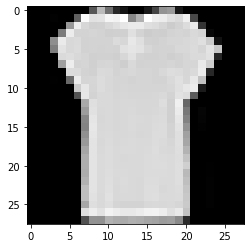

In [3]:
ind = np.random.randint(0, X_train.shape[0])
plt.imshow(X_train[ind], cmap='gray')
print(f'Label is {y_train_labels[ind]}')

In [4]:
# Нормирование
X_train = X_train / 255.0
X_test = X_test / 255.0
X_train.min(), X_train.max()

(0.0, 1.0)

In [5]:
X_train = X_train.reshape((-1, 28 * 28))
X_test = X_test.reshape((-1, 28 * 28))

X_train.shape, X_test.shape

((60000, 784), (10000, 784))

In [6]:
model_history = []
n_list = [int(i) for i in np.geomspace(5, 500, num=15, axis=0).tolist()]


for n_neurons in tqdm(n_list):

    # define the keras model
    model = Sequential()
    model.add(Dense(n_neurons, input_shape=(28 * 28,), activation='relu'))
    model.add(Dense(10, activation='sigmoid'))
    #model.summary()

    config = model.get_config()

    model.compile(loss='categorical_crossentropy', optimizer='SGD', metrics=['accuracy'])

   
    y_train = to_categorical(y_train_labels)
    y_test = to_categorical(y_test_labels)

    y_train[:5]


    
    history = model.fit(X_train, y_train,
                        epochs=5,
                        batch_size=64,
                        verbose=0,
                        validation_data=(X_test, y_test)                        
                        )
    model_history.append([history, n_neurons])

100%|██████████████████████████████████████████████████████████████████████████████████| 15/15 [02:00<00:00,  8.04s/it]


In [7]:
model_history[0][0].history['accuracy'][-1]

0.7953000068664551

In [8]:
df = pd.DataFrame(columns=['no. neurons', 'train accuracy', 'val_accuracy'])
i = 0
for i in range(len(model_history)):    
    df.loc[i] = [model_history[i][1], model_history[i][0].history['accuracy'][-1],\
                 model_history[i][0].history['val_accuracy'][-1]]
    i += 1
df

,no. neurons,train accuracy,val_accuracy
0,5.0,0.795300,0.7871
1,6.0,0.782267,0.7789
2,9.0,0.813000,0.8085
3,13.0,0.824550,0.8191
4,18.0,0.828117,0.8205
5,25.0,0.835817,0.8249
6,35.0,0.834983,0.8260
7,49.0,0.834483,0.8251
8,69.0,0.836033,0.8277
9,96.0,0.837633,0.8245


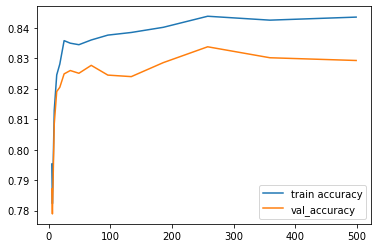

In [9]:
plt.plot(df['no. neurons'], df['train accuracy'], label='train accuracy')
plt.plot(df['no. neurons'], df['val_accuracy'], label='val_accuracy')
plt.legend();

**Вывод**: С ростом количества нейронов, качество растёт.

#### 2-х слойная модель, входной слой = 28 нейронов

In [10]:
model = Sequential()
model.add(Dense(28, input_shape=(28 * 28,), activation='relu'))
model.add(Dense(10, activation='sigmoid'))
#model.summary()

config = model.get_config()

model.compile(loss='categorical_crossentropy', optimizer='SGD', metrics=['accuracy'])

y_train = to_categorical(y_train_labels)
y_test = to_categorical(y_test_labels)

history_2 = model.fit(X_train, y_train,
                    epochs=5,
                    batch_size=64,
                    verbose=0,
                    validation_data=(X_test, y_test)
                    )

In [11]:
df_ = pd.DataFrame(columns=['architecture', 'train accuracy', 'val_accuracy'])

df_.loc[1] = ['2 layers, input=28', history_2.history['accuracy'][-1],\
                 history_2.history['val_accuracy'][-1]]

df_

,architecture,train accuracy,val_accuracy
1,"2 layers, input=28",0.8331,0.8265


#### 2-х слойная модель, входной слой = 28 * 28 нейронов

In [12]:
model = Sequential()
model.add(Dense(28 * 28, input_shape=(28 * 28,), activation='relu'))
model.add(Dense(10, activation='sigmoid'))
#model.summary()

config = model.get_config()

model.compile(loss='categorical_crossentropy', optimizer='SGD', metrics=['accuracy'])

y_train = to_categorical(y_train_labels)
y_test = to_categorical(y_test_labels)

history_2 = model.fit(X_train, y_train,
                    epochs=5,
                    batch_size=64,
                    verbose=0,
                    validation_data=(X_test, y_test)
                    )

In [13]:
df_.loc[2] = ['2 layers, input=28*28', history_2.history['accuracy'][-1],\
                 history_2.history['val_accuracy'][-1]]

df_

,architecture,train accuracy,val_accuracy
1,"2 layers, input=28",0.8331,0.8265
2,"2 layers, input=28*28",0.8462,0.8362


#### 3-х слойная модель, входной слой = 28 нейронов

In [14]:
model = Sequential()
model.add(Dense(28, input_shape=(28 * 28,), activation='relu'))
model.add(Dense(18, activation='relu'))
model.add(Dense(10, activation='sigmoid'))
#model.summary()

config = model.get_config()

model.compile(loss='categorical_crossentropy', optimizer='SGD', metrics=['accuracy'])

y_train = to_categorical(y_train_labels)
y_test = to_categorical(y_test_labels)

history_3 = model.fit(X_train, y_train,
                    epochs=5,
                    batch_size=64,
                    verbose=0,
                    validation_data=(X_test, y_test)е
                    )

In [15]:
df_.loc[3] = ['3 layers, input=28', history_3.history['accuracy'][-1],\
                 history_3.history['val_accuracy'][-1]]

df_

,architecture,train accuracy,val_accuracy
1,"2 layers, input=28",0.833100,0.8265
2,"2 layers, input=28*28",0.846200,0.8362
3,"3 layers, input=28",0.836383,0.8219


#### 3-х слойная модель, входной слой = 28 * 28 нейронов

In [16]:
model = Sequential()
model.add(Dense(28*28, input_shape=(28 * 28,), activation='relu'))
model.add(Dense(392, activation='relu'))
model.add(Dense(10, activation='sigmoid'))

config = model.get_config()

model.compile(loss='categorical_crossentropy', optimizer='SGD', metrics=['accuracy'])

y_train = to_categorical(y_train_labels)
y_test = to_categorical(y_test_labels)

history_3 = model.fit(X_train, y_train,
                    epochs=5,
                    batch_size=64,
                    verbose=0,
                    validation_data=(X_test, y_test)
                    )

In [17]:
df_.loc[4] = ['3 layers, input=28*28', history_3.history['accuracy'][-1],\
                 history_3.history['val_accuracy'][-1]]

df_

,architecture,train accuracy,val_accuracy
1,"2 layers, input=28",0.833100,0.8265
2,"2 layers, input=28*28",0.846200,0.8362
3,"3 layers, input=28",0.836383,0.8219
4,"3 layers, input=28*28",0.854867,0.8403


#### 5-ти слойная модель, входной слой = 28 нейронов

In [18]:
model = Sequential()
model.add(Dense(28, input_shape=(28 * 28,), activation='relu'))
model.add(Dense(24, activation='relu'))
model.add(Dense(18, activation='relu'))
model.add(Dense(14, activation='relu'))
model.add(Dense(10, activation='sigmoid'))

config = model.get_config()

model.compile(loss='categorical_crossentropy', optimizer='SGD', metrics=['accuracy'])

y_train = to_categorical(y_train_labels)
y_test = to_categorical(y_test_labels)

history_5 = model.fit(X_train, y_train,
                    epochs=5,
                    batch_size=64,
                    verbose=0,
                    validation_data=(X_test, y_test)
                    )

In [19]:
df_.loc[5] = ['5 layers, input=28', history_5.history['accuracy'][-1],\
                 history_5.history['val_accuracy'][-1]]

df_

,architecture,train accuracy,val_accuracy
1,"2 layers, input=28",0.833100,0.8265
2,"2 layers, input=28*28",0.846200,0.8362
3,"3 layers, input=28",0.836383,0.8219
4,"3 layers, input=28*28",0.854867,0.8403
5,"5 layers, input=28",0.825967,0.8113


#### 5-ти слойная модель, входной слой = 28 * 28 нейронов

In [20]:
model = Sequential()
model.add(Dense(28 * 28, input_shape=(28 * 28,), activation='relu'))
model.add(Dense(196, activation='relu'))
model.add(Dense(98, activation='relu'))
model.add(Dense(49, activation='relu'))
model.add(Dense(10, activation='sigmoid'))

config = model.get_config()

model.compile(loss='categorical_crossentropy', optimizer='SGD', metrics=['accuracy'])

y_train = to_categorical(y_train_labels)
y_test = to_categorical(y_test_labels)

history_5 = model.fit(X_train, y_train,
                    epochs=5,
                    batch_size=64,
                    verbose=0,
                    validation_data=(X_test, y_test)
                    )

In [21]:
df_.loc[6] = ['5 layers, input=28*28', history_5.history['accuracy'][-1],\
                 history_5.history['val_accuracy'][-1]]

df_

,architecture,train accuracy,val_accuracy
1,"2 layers, input=28",0.833100,0.8265
2,"2 layers, input=28*28",0.846200,0.8362
3,"3 layers, input=28",0.836383,0.8219
4,"3 layers, input=28*28",0.854867,0.8403
5,"5 layers, input=28",0.825967,0.8113
6,"5 layers, input=28*28",0.861367,0.8182


#### 10-ти слойная модель, входной слой = 28 нейронов

In [22]:
model = Sequential()
model.add(Dense(28, input_shape=(28 * 28,), activation='relu'))
model.add(Dense(26, activation='relu'))
model.add(Dense(24, activation='relu'))
model.add(Dense(22, activation='relu'))
model.add(Dense(20, activation='relu'))
model.add(Dense(18, activation='relu'))
model.add(Dense(16, activation='relu'))
model.add(Dense(14, activation='relu'))
model.add(Dense(12, activation='relu'))
model.add(Dense(10, activation='sigmoid'))

config = model.get_config()

model.compile(loss='categorical_crossentropy', optimizer='SGD', metrics=['accuracy'])

y_train = to_categorical(y_train_labels)
y_test = to_categorical(y_test_labels)

history_10 = model.fit(X_train, y_train,
                    epochs=5,
                    batch_size=64,
                    verbose=0,
                    validation_data=(X_test, y_test)
                    )

In [23]:
df_.loc[7] = ['10 layers, input=28', history_10.history['accuracy'][-1],\
                 history_10.history['val_accuracy'][-1]]

df_

,architecture,train accuracy,val_accuracy
1,"2 layers, input=28",0.833100,0.8265
2,"2 layers, input=28*28",0.846200,0.8362
3,"3 layers, input=28",0.836383,0.8219
4,"3 layers, input=28*28",0.854867,0.8403
5,"5 layers, input=28",0.825967,0.8113
6,"5 layers, input=28*28",0.861367,0.8182
7,"10 layers, input=28",0.813000,0.7965


#### 10-ти слойная модель, входной слой = 28 * 28 нейронов

In [24]:
model = Sequential()
model.add(Dense(28 * 28, input_shape=(28 * 28,), activation='relu'))
model.add(Dense(392, activation='relu'))
model.add(Dense(296, activation='relu'))
model.add(Dense(180, activation='relu'))
model.add(Dense(110, activation='relu'))
model.add(Dense(70, activation='relu'))
model.add(Dense(42, activation='relu'))
model.add(Dense(26, activation='relu'))
model.add(Dense(16, activation='relu'))
model.add(Dense(10, activation='sigmoid'))

config = model.get_config()

model.compile(loss='categorical_crossentropy', optimizer='SGD', metrics=['accuracy'])

y_train = to_categorical(y_train_labels)
y_test = to_categorical(y_test_labels)

history_10_ = model.fit(X_train, y_train,
                    epochs=5,
                    batch_size=64,
                    verbose=0,
                    validation_data=(X_test, y_test)
                    )

In [25]:
df_.loc[8] = ['10 layers, input=28*28', history_10_.history['accuracy'][-1],\
                 history_10_.history['val_accuracy'][-1]]

df_

,architecture,train accuracy,val_accuracy
1,"2 layers, input=28",0.833100,0.8265
2,"2 layers, input=28*28",0.846200,0.8362
3,"3 layers, input=28",0.836383,0.8219
4,"3 layers, input=28*28",0.854867,0.8403
5,"5 layers, input=28",0.825967,0.8113
6,"5 layers, input=28*28",0.861367,0.8182
7,"10 layers, input=28",0.813000,0.7965
8,"10 layers, input=28*28",0.856033,0.8360


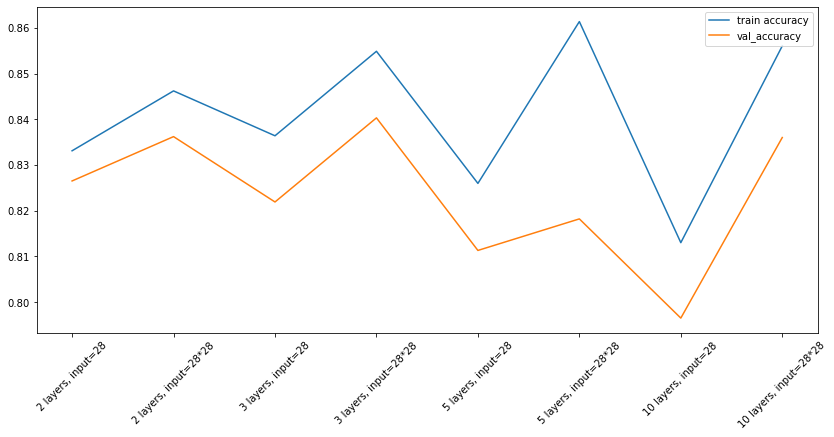

In [40]:
plt.figure(figsize=(14,6)) 
plt.plot(df_['architecture'], df_['train accuracy'], label='train accuracy')
plt.plot(df_['architecture'], df_['val_accuracy'], label='val_accuracy')
plt.xticks(rotation=45)
plt.legend();

**Вывод**: большее количества слоёв при одинаковом количестве эпох делает скор хуже.

**Для дальнейшей работы возьму модель с лучшими метриками. Это 3-х слойная модель, входной слой = 28 * 28 нейронов**.

In [42]:
SGD(learning_rate=0.01, momentum=0.5)
Adagrad(learning_rate=0.001, initial_accumulator_value=0.1, epsilon=1e-07)
RMSprop(learning_rate=0.001, rho=0.9, epsilon=1e-07)
Adam(learning_rate=0.001, beta_1=0.9, beta_2=0.999, epsilon=1e-07)

4it [04:15, 63.88s/it]


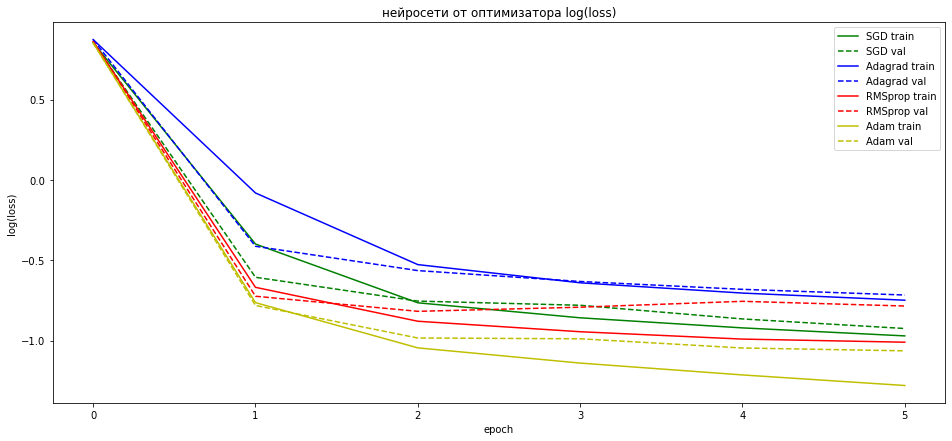

Wall time: 4min 15s


In [45]:
%%time
tf.random.set_seed(1)

models = {}

plt.figure(figsize=(16, 7))
colors = ['g', 'b', 'r', 'y']

num_epochs = 5
batch_size = 32

epoch = np.arange(num_epochs+1)

for i, i_optim in enumerate([keras.optimizers.SGD(),
                             keras.optimizers.Adagrad(),
                             keras.optimizers.RMSprop(),
                             keras.optimizers.Adam()]):
    
    model_i = Sequential([
        Dense(28 * 28, activation='relu', input_shape=(28 * 28,)),
        Dense(392, activation='relu'),
        Dense(10, activation='sigmoid'),
    ])
    
    model_i.compile(
        optimizer=i_optim,
        loss='categorical_crossentropy',
        metrics=['accuracy'],
        )
    
    h0_train = model_i.evaluate(X_train, y_train, verbose=0)
    h0_val = model_i.evaluate(X_test, y_test, verbose=0)

    h = model_i.fit(X_train, y_train,
                    epochs=num_epochs,
                    batch_size=batch_size,
                    validation_data=(X_test, y_test),
                    verbose=0)

    models[i_optim.get_config()['name']] = model_i

    plt.plot(epoch, np.log([h0_train[0]] + h.history['loss']),
             '-', c=colors[i],
             label=model_i.optimizer.get_config()['name'] + ' train')
    plt.plot(epoch, np.log([h0_val[0]] + h.history['val_loss']),
             '--', c=colors[i],
             label=model_i.optimizer.get_config()['name'] + ' val')

plt.legend()
plt.title('нейросети от оптимизатора log(loss)')
plt.xlabel('epoch')
plt.ylabel('log(loss)')
plt.show()

In [56]:
h.history

{'loss': [0.46585819125175476,
  0.3515257239341736,
  0.31976771354675293,
  0.29703643918037415,
  0.2781214416027069],
 'accuracy': [0.8317833542823792,
  0.8707500100135803,
  0.8815666437149048,
  0.8895000219345093,
  0.8954333066940308],
 'val_loss': [0.4576747417449951,
  0.3737759590148926,
  0.3720061480998993,
  0.3512427806854248,
  0.34509506821632385],
 'val_accuracy': [0.8305000066757202,
  0.8639000058174133,
  0.8672000169754028,
  0.8704000115394592,
  0.8797000050544739]}

**Вывод**: у модели без оптимизатора ско = 0.8403. С оптимизатором Адам = 0.8797.

Оптимизатор помог улучшить качество.